In [78]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [79]:
penguins_df = pd.read_csv("noisy_datasets/penguins.csv")

print("Penguin Data \n", penguins_df.describe())
print(penguins_df.count())
print(penguins_df.columns.tolist())

Penguin Data 
        calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.

In [80]:
penguins_df.info()
penguins_df = penguins_df.dropna(subset=['species', 'island', 'gender'])
penguins_df = penguins_df.fillna(penguins_df.select_dtypes(include='number').mean())
penguins_df[['species', 'island', 'gender']] = penguins_df[['species', 'island', 'gender']].applymap(str.lower)
Q1 = penguins_df.select_dtypes(include='number').quantile(0.25)
Q3 = penguins_df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = pd.DataFrame(False, index=penguins_df.index, columns=penguins_df.columns)
for column in penguins_df.select_dtypes(include='number').columns:
    outliers[column] = (penguins_df[column] < lower_bound[column]) | (penguins_df[column] > upper_bound[column])
for column in penguins_df.select_dtypes(include='number').columns:
    penguins_df[column] = penguins_df[column].where(~outliers[column], penguins_df[column].median())

print("Penguin Data \n", penguins_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB
Penguin Data 
        calorie requirement  average sleep duration  bill_length_mm  \
count           311.000000              311.000000      311.000000   
mean           5270.070740               

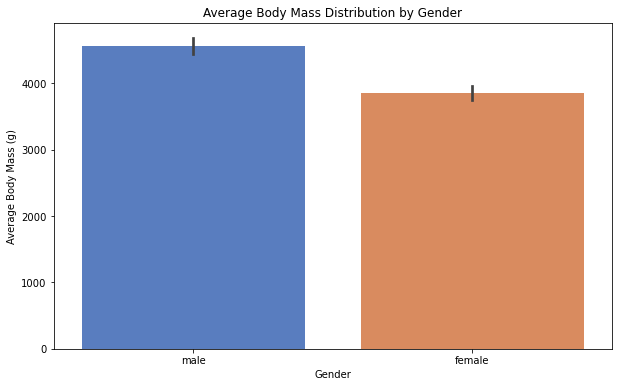

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='body_mass_g', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Body Mass Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Body Mass (g)')
plt.show()

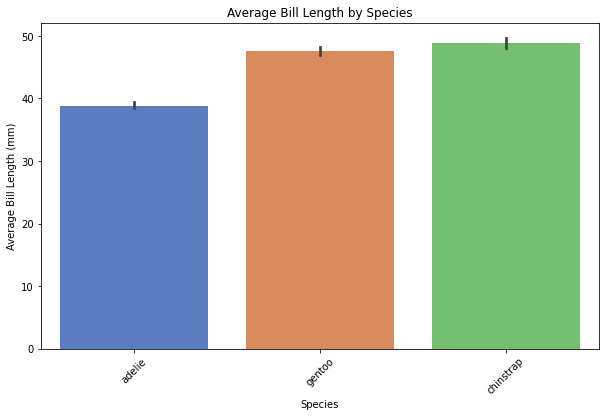

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='bill_length_mm', data=penguins_df, estimator=np.mean, palette='muted')
plt.title('Average Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Bill Length (mm)')
plt.xticks(rotation=45)
plt.show()


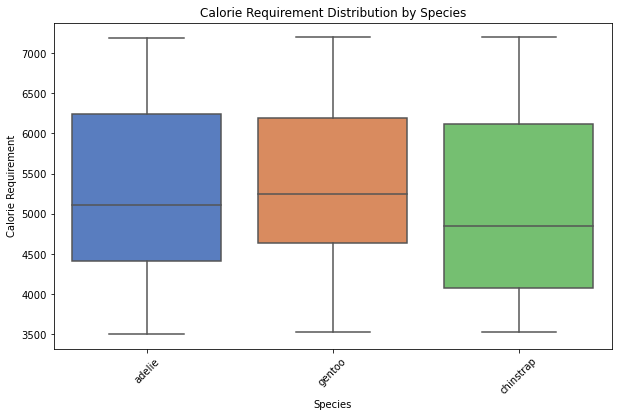

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='calorie requirement', data=penguins_df, palette='muted')
plt.title('Calorie Requirement Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Calorie Requirement')
plt.xticks(rotation=45)
plt.show()


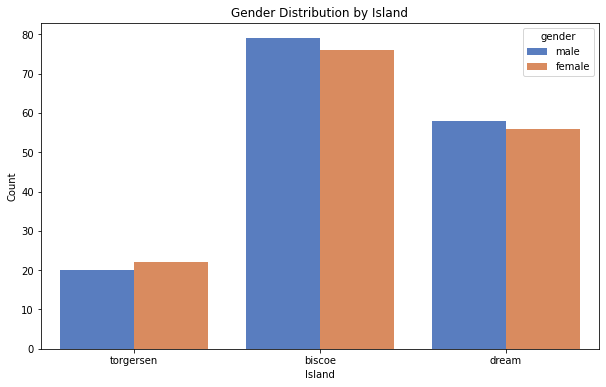

In [84]:
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='gender', data=penguins_df, palette='muted')
plt.title('Gender Distribution by Island')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()


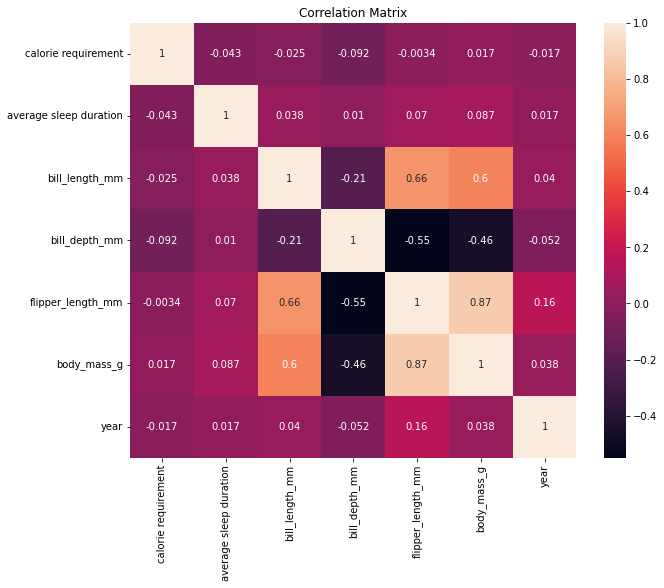

In [85]:
numeric_df = penguins_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [86]:
penguins_df = pd.get_dummies(penguins_df, columns=['species', 'island'], drop_first=False)
penguins_df['gender_target'] = penguins_df['gender'].map({'female': 0, 'male': 1})
penguins_df = penguins_df.drop('gender', axis=1)
correlation_matrix = penguins_df.corr()
target_correlation = correlation_matrix['gender_target']
print(target_correlation)
threshold = 0.1 
low_correlation_features = target_correlation[target_correlation.abs() < threshold].index.tolist()
print(low_correlation_features)
corelated_df = penguins_df.drop(columns=low_correlation_features)
corelated_df.head(5)

calorie requirement      -0.015871
average sleep duration    0.083965
bill_length_mm            0.364078
bill_depth_mm             0.368999
flipper_length_mm         0.273502
body_mass_g               0.436622
year                      0.003394
species_adelie           -0.021469
species_chinstrap         0.003139
species_gentoo            0.019557
island_biscoe             0.009678
island_dream              0.006008
island_torgersen         -0.022629
gender_target             1.000000
Name: gender_target, dtype: float64
['calorie requirement', 'average sleep duration', 'year', 'species_adelie', 'species_chinstrap', 'species_gentoo', 'island_biscoe', 'island_dream', 'island_torgersen']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_target
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [87]:
non_categorical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
min_values = corelated_df[non_categorical_columns].min()
max_values = corelated_df[non_categorical_columns].max()
corelated_df[non_categorical_columns] = (corelated_df[non_categorical_columns] - min_values) / (max_values - min_values)


In [88]:
corelated_df.to_csv('penguins_preprocessed.csv', index=False)


In [89]:
red_wine = pd.read_csv('noisy_datasets/wine_quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('noisy_datasets/wine_quality/winequality-white.csv', sep=';')
red_wine['Wine Type'] = 'Red'
white_wine['Wine Type'] = 'White'
wine_quality = pd.concat([red_wine, white_wine], ignore_index=True)
print(wine_quality.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [90]:
print("Missing values: ",wine_quality.isnull().sum())
print("As there are no missing values, we do not have to handle it.")
print(wine_quality.info())
print("As Wine Type is the only object column which was also entered by us, we know the case will be constant.")

Missing values:  fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Wine Type               0
dtype: int64
As there are no missing values, we do not have to handle it.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   

In [91]:
outlier_indices = []
for col in wine_quality.select_dtypes(include=['number']).columns:
    Q1 = wine_quality[col].quantile(0.25)
    Q3 = wine_quality[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wine_quality[(wine_quality[col] < lower_bound) | (wine_quality[col] > upper_bound)]
    outlier_indices.extend(outliers.index)
    wine_quality[col] = wine_quality[col].where((wine_quality[col] >= lower_bound) & (wine_quality[col] <= upper_bound), wine_quality[col].median())
print(f"Outliers count: {len(set(outlier_indices))}")
print("Since the dataset will be reduced by more than 1600 values, we replace the outliers with the median.")


Outliers count: 1657
Since the dataset will be reduced by more than 1600 values, we replace the outliers with the median.


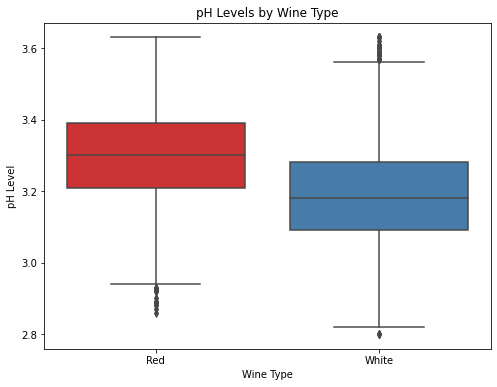

In [92]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Wine Type', y='pH', data=wine_quality, palette='Set1')
plt.title('pH Levels by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('pH Level')
plt.show()

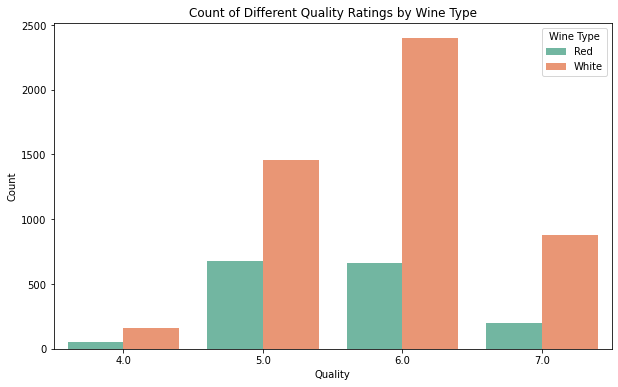

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='Wine Type', data=wine_quality, palette='Set2')
plt.title('Count of Different Quality Ratings by Wine Type')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

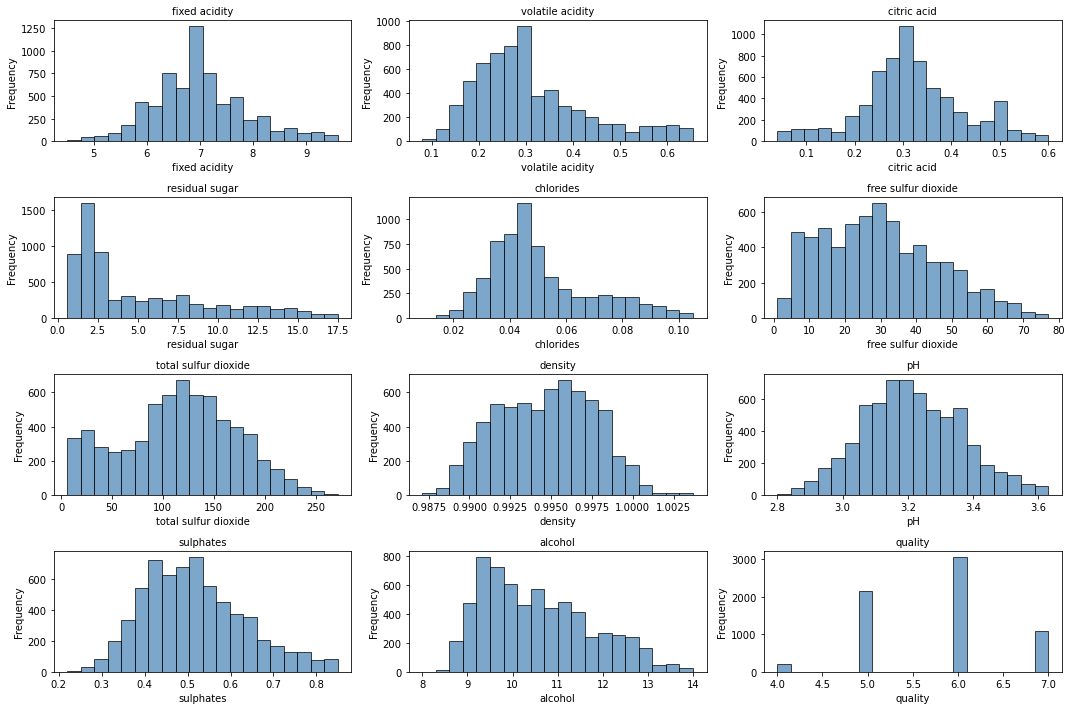

In [94]:
numeric_columns = wine_quality.select_dtypes(include=['float64', 'int64']).columns
fig, axs = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 12)) 
axs = axs.ravel() 

for i, column in enumerate(numeric_columns):
    axs[i].hist(wine_quality[column], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    axs[i].set_title(f'{column}', fontsize=10)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

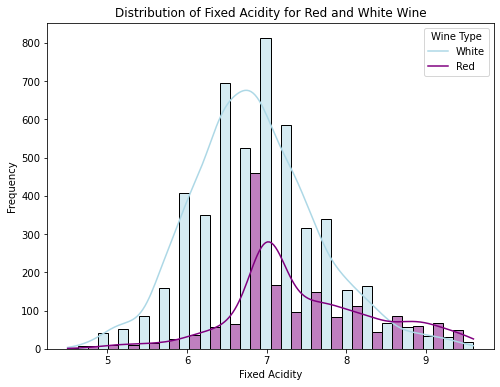

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_quality, x='fixed acidity', hue='Wine Type', kde=True, bins=20, multiple='dodge', palette={'Red': 'purple', 'White': 'lightblue'})
plt.title('Distribution of Fixed Acidity for Red and White Wine')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.legend(title='Wine Type', labels=['White','Red'])
plt.show()

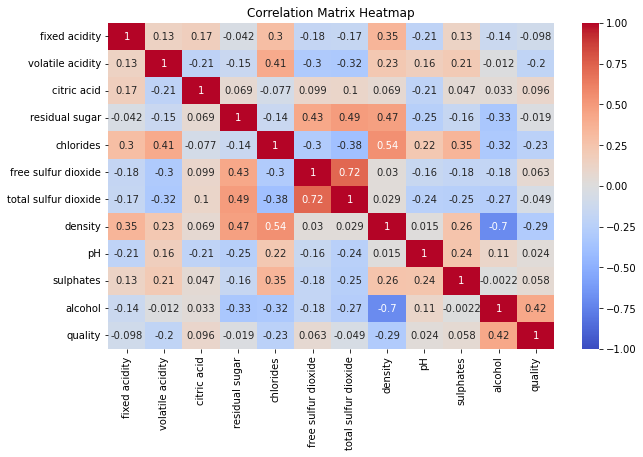

In [96]:
numeric_cols = wine_quality.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(10, 6))
corr_matrix = wine_quality[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [97]:
wine_quality = pd.get_dummies(wine_quality, columns=['Wine Type'], drop_first=False)
correlation_matrix = wine_quality.corr()
quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlations of features with Quality: ")
print(quality_corr)
threshold = 0.1
low_correlation_features = quality_corr[quality_corr.abs() < threshold].index.tolist()
print(f"Features with low correlation with Quality: {low_correlation_features}")
wine_quality = wine_quality.drop(columns=low_correlation_features)
wine_quality.head(5)

Correlations of features with Quality: 
quality                 1.000000
alcohol                 0.424999
Wine Type_White         0.104120
citric acid             0.095853
free sulfur dioxide     0.063031
sulphates               0.058413
pH                      0.024117
residual sugar         -0.019136
total sulfur dioxide   -0.048706
fixed acidity          -0.098150
Wine Type_Red          -0.104120
volatile acidity       -0.201473
chlorides              -0.229042
density                -0.292739
Name: quality, dtype: float64
Features with low correlation with Quality: ['citric acid', 'free sulfur dioxide', 'sulphates', 'pH', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']


,volatile acidity,chlorides,density,alcohol,quality,Wine Type_Red,Wine Type_White
0,0.29,0.076,0.9978,9.4,5.0,1,0
1,0.29,0.098,0.9968,9.8,5.0,1,0
2,0.29,0.092,0.9970,9.8,5.0,1,0
3,0.28,0.075,0.9980,9.8,6.0,1,0
4,0.29,0.076,0.9978,9.4,5.0,1,0


In [98]:
non_categorical_columns = wine_quality.select_dtypes(include=['number']).columns.tolist()
min_values = wine_quality[non_categorical_columns].min()
max_values = wine_quality[non_categorical_columns].max()
wine_quality[non_categorical_columns] = (wine_quality[non_categorical_columns] - min_values) / (max_values - min_values)


In [99]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   float64
 5   Wine Type_Red     6497 non-null   float64
 6   Wine Type_White   6497 non-null   float64
dtypes: float64(7)
memory usage: 355.4 KB


In [100]:
wine_quality.to_csv('wine_quality_preprocessed.csv', index=False)


In [101]:
diamonds_df = pd.read_csv("noisy_datasets/diamond.csv")
print("\nDiamond Data \n", diamonds_df.describe())


Diamond Data 
        average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000


In [102]:
print("Shape of diamonds dataset before dropping na values: ",diamonds_df.shape)

Shape of diamonds dataset before dropping na values:  (53940, 13)


In [103]:
num_cols = ['Unnamed: 0', 'carat', 'average us salary', 'number of diamonds mined (millions)', 'depth',	'table', 'price', 'x', 'y', 'z']
for cols in num_cols:
    diamonds_df[cols] = pd.to_numeric(diamonds_df[cols], errors = 'coerce')
    diamonds_df[cols] = diamonds_df[cols].fillna(diamonds_df[cols].median())
diamonds_df = diamonds_df.dropna()
print("Shape of diamonds dataset after replacing na values with median and dropping remaining NA values: ",diamonds_df.shape)

Shape of diamonds dataset after replacing na values with median and dropping remaining NA values:  (51334, 13)


In [104]:
print(diamonds_df.isnull().sum())
# No missing values in the dataset is found
string_cols = []
for cols in diamonds_df.columns:
    if diamonds_df[cols].dtype == 'object':
        string_cols.append(cols)
diamonds_df[string_cols] = diamonds_df[string_cols].apply(lambda x: x.str.lower())
diamonds_df

Unnamed: 0                             0
carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1.0,0.23,ideal,e,si2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,premium,e,si1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4.0,0.29,premium,i,vs2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,good,j,si2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,ideal,d,si1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937.0,0.72,good,d,si1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938.0,0.70,very good,d,si1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939.0,0.86,premium,h,si2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [105]:
diamond_df_cols = ['carat', 'average us salary', 'number of diamonds mined (millions)', 'depth', 'table', 
       'price', 'x', 'y', 'z']

for cols in diamond_df_cols:
    if diamonds_df[cols].dtype != 'object':
        q1 = diamonds_df[cols].quantile(0.25)
        q3 = diamonds_df[cols].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        outliers = diamonds_df[(diamonds_df[cols] < lb) | (diamonds_df[cols] > ub)]
        print(f"Outliers of Column {cols}: ", outliers)
        if not outliers.empty:
            median1 = diamonds_df[cols].median()
            diamonds_df[cols] = diamonds_df[cols].apply(lambda x: median1 if (x < lb or x > ub) else x)
print('Diamonds datset after replacing outliers with median values: ', diamonds_df.head(10))

Outliers of Column carat:         Unnamed: 0  carat        cut color clarity  average us salary  \
11634     11635.0   2.00    premium     j      i1              32939   
12246     12247.0   2.06    premium     j      i1              40497   
13002     13003.0   2.14       fair     j      i1              31965   
13118     13119.0   2.15       fair     j      i1              42063   
13757     13758.0   2.22       fair     j      i1              46284   
...           ...    ...        ...   ...     ...                ...   
27744     27745.0   2.29    premium     i     si1              44106   
27745     27746.0   2.00  very good     h     si1              40583   
27746     27747.0   2.07      ideal     g     si2              38530   
27748     27749.0   2.00  very good     g     si1              41558   
27749     27750.0   2.29    premium     i     vs2              39679   

       number of diamonds mined (millions)  depth  table    price     x     y  \
11634                      

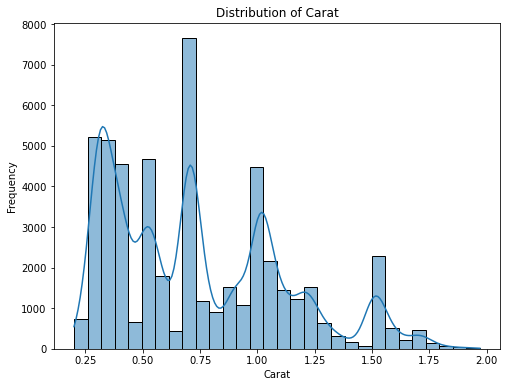

In [106]:
plt.figure(figsize=(8, 6))
sns.histplot(diamonds_df['carat'], bins=30, kde=True)
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.show()

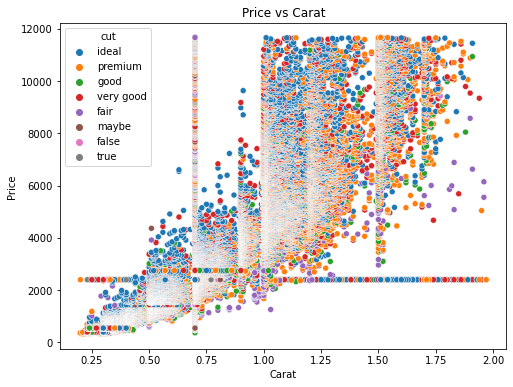

In [107]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diamonds_df, x='carat', y='price', hue='cut')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

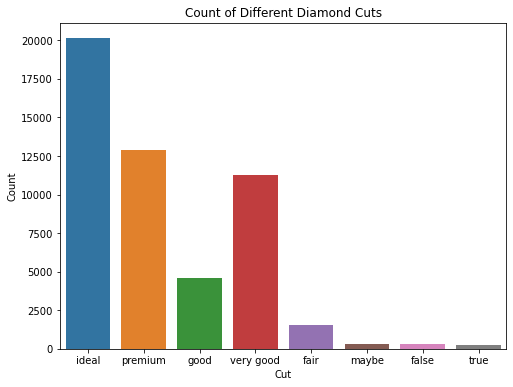

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(data=diamonds_df, x='cut')
plt.title('Count of Different Diamond Cuts')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

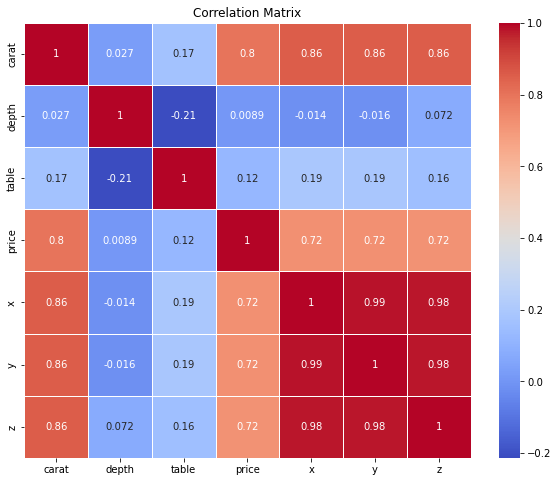

In [109]:
plt.figure(figsize=(10, 8))
corr_matrix = diamonds_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

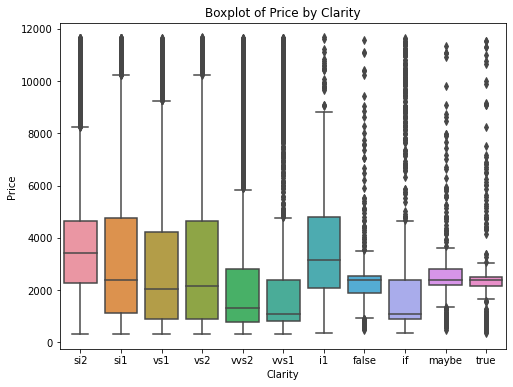

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=diamonds_df, x='clarity', y='price')
plt.title('Boxplot of Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

In [111]:
categorical_cols = ['cut', 'color', 'clarity']
diamonds_df = pd.get_dummies(diamonds_df, columns=categorical_cols, drop_first=True)

corr_matrix = diamonds_df.corr()
price_correlations = corr_matrix['price'].sort_values(ascending=False)
print("Correlations of features with price:")
print(price_correlations)

threshold = 0.1
low_correlation_features = price_correlations[price_correlations.abs() < threshold].index.tolist()
print(f"Features with low correlation with price: {low_correlation_features}")
diamonds_df = diamonds_df.drop(columns=low_correlation_features)


Correlations of features with price:
price                                  1.000000
carat                                  0.800271
y                                      0.722517
x                                      0.720596
z                                      0.718817
table                                  0.122540
clarity_si2                            0.099930
cut_premium                            0.070100
color_i                                0.061196
color_h                                0.059581
color_j                                0.059349
clarity_si1                            0.025035
clarity_i1                             0.024985
color_g                                0.017333
cut_very good                          0.015917
cut_good                               0.014284
depth                                  0.008897
clarity_vs1                            0.001540
average us salary                      0.000877
clarity_true                          -0.002966
col

In [112]:
numerical_cols = diamonds_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
diamonds_df_copy = diamonds_df.copy()

for col in numerical_cols:
    min_value = diamonds_df_copy[col].min()
    max_value = diamonds_df_copy[col].max()
    diamonds_df_copy[col] = (diamonds_df_copy[col] - min_value) / (max_value - min_value)

print(diamonds_df_copy[numerical_cols].describe())

         Unnamed: 0         carat         table         price             x  \
count  51334.000000  51334.000000  51334.000000  51334.000000  51334.000000   
mean       0.500255      0.304726      0.483900      0.242204      0.367442   
std        0.286283      0.214242      0.170945      0.230681      0.201988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.254366      0.112994      0.369748      0.056339      0.183824   
50%        0.500352      0.282486      0.453782      0.182948      0.362132   
75%        0.746283      0.457627      0.621849      0.359086      0.512868   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  y             z  
count  51334.000000  51334.000000  
mean       0.371775      0.497159  
std        0.198925      0.159062  
min        0.000000      0.000000  
25%        0.190217      0.352804  
50%        0.367754      0.495327  
75%        0.514493      0.612150  


In [113]:
diamonds_df_copy.to_csv('diamonds_preprocessed.csv', index=False)


References:
-> Assignment_0 Part-3 Pandas Basics question 8 and question 9.
-> https://www.geeksforgeeks.org/plotting-graph-using-seaborn-python/